## Dataset and Problem Introduction
In this analysis, we explore some of the history of Lego and the variations in Lego sets over time. The data used is from the Rebrickable's dataset which includes data on every set of Lego ever sold.

An overview of the database schema for the Rebrickable dataset can be seen below.
<p><img src="datasets/downloads_schema.png"></p>

<br>Data Source: https://rebrickable.com/downloads/
<br>Reference: https://www.datacamp.com/

In [42]:
# Import pandas
import pandas as pd

# Read colors data
colours = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colours.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## Colours
<p>After reading in the <code>colours</code> dataset, we can further explore it by examining the number of colours available.</p>

In [43]:
# How many distinct colors are available?
num_colours = colors.rgb.size

# Print num_colors
print('Number of distinct Lego colours:', num_colours)

Number of distinct Lego colours: 135


## Transparent Colours
<p>The <code>colours</code> dataset has a column named <code>is_trans</code> that indicates whether a colour is transparent or not. We can see the distribution of transparent vs. non-transparent colours in the below table.</p>

In [44]:
# Summarize colors based on whether they are transparent or not?
colours_summary = colours.groupby('is_trans').count()
colours_summary

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


## Lego Sets Dataset
<p>Another dataset available in this database is the <code>sets</code> dataset. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contains. </p>

In [45]:
# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


The above table displays the top 5 records in the Lego sets dataset.
<br>We can use this dataset to examine how the average number of parts in a Lego set has changed over time.

Text(0.5, 0, 'Year')

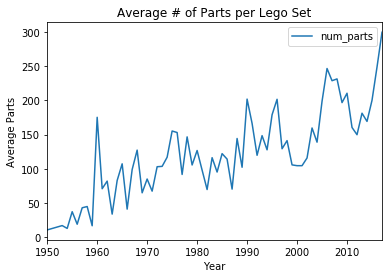

In [46]:
%matplotlib inline

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets[['year', 'num_parts']].groupby('year').mean()

# Plot trends in average number of parts by year
ax = parts_by_year.plot(title = 'Average # of Parts per Lego Set',)
ax.set_ylabel("Average Parts")
ax.set_xlabel("Year")

## Lego Themes Over Time
<p>Lego sets are also distinguished based on different <a href="https://shop.lego.com/en-US/Themes">themes</a>. 
<br>Therefore, we can also examine the release of different themes over time, and see which years released the most number of themes in a single year.</p>

In [47]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets.groupby('year')[['theme_id']].nunique().sort_values(by=['theme_id'],ascending=False)
themes_by_year.rename(columns={'theme_id': '# of themes'}, inplace=True)
themes_by_year.head(10)

,# of themes
year,
2015,99
2013,93
2012,93
2014,92
2009,89
2016,88
2010,88
2008,87
2003,80
